Insights and Visualizations
=======================


     WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. These ratings almost always have a denominator of 10. The numerators, though? Almost always greater than 10. 11/10, 12/10, 13/10, etc. Why? Because "they're good dogs Brent." WeRateDogs has over 4 million followers and has received international media coverage.

    WeRateDogs downloaded their Twitter archive and sent it to Udacity via email exclusively for you to use in this project. This archive contains basic tweet data (tweet ID, timestamp, text, etc.) for all 5000+ of their tweets as they stood on August 1, 2017. More on this soon.




In [2]:
# Import all required libraries 
import numpy as np
import pandas as pd
import json
import re
import requests
import configparser
import datetime
import matplotlib.pyplot as plt
import os
import seaborn as sns
from scipy import stats
import warnings
warnings.filterwarnings('ignore') 
%matplotlib inline 
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

In [3]:
twitter_archive = pd.read_csv('Twitter_archive_master.csv')

In [313]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,tweet_date,tweet_source,tweet_text,expanded_urls,img_url,img_num,retweets,favorites,rating_ratio,dog_breed,confidence,dog_name,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,8853.0,39467.0,1.3,No breed,0.000000,Phineas,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,6514.0,33819.0,1.3,Chihuahua,0.323581,Tilly,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,4328.0,25461.0,1.2,Chihuahua,0.716012,Archie,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,8964.0,42908.0,1.3,Labrador_retriever,0.168086,Darla,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,9774.0,41048.0,1.2,basset,0.555712,Franklin,NaN


In [6]:
#Get the maximum frequency of dogs types predicted
print(' The maximum number of predicted dogs type :',twitter_archive['dog_type'].value_counts().max())

 The maximum number of predicted dogs type : 131


In [9]:
#Get the minimum frequency of dogs types predicted
print(' The minimum number of predicted dogs type :',twitter_archive['dog_type'].value_counts().min())

 The minimum number of predicted dogs type : 5


In [15]:
#average number of retweets count
print('The average number of retweets count:',round(twitter_archive['retweets'].mean()))

The average number of retweets count: 2708.0


In [16]:
print('largest number of tweets done by a user :',twitter_archive['tweet_id'].value_counts().max())

largest number of tweets done by a user : 4


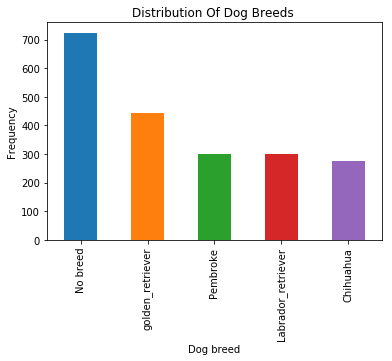

In [17]:
# select the dog breed frequencies
twitter_archive['dog_breed'].value_counts()[:5].plot('bar')
plt.title("Distribution Of Dog Breeds ")
plt.xlabel('Dog breed')
plt.ylabel('Frequency');

The figure shows Top 5 dog's breed

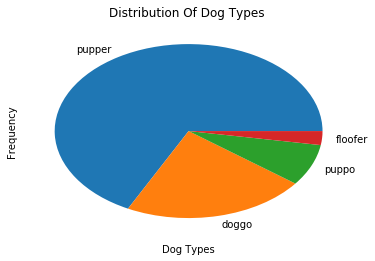

In [325]:
# select the dog types frequencies
twitter_archive['dog_type'].value_counts()[:5].plot('pie')
plt.title("Distribution Of Dog Types ")
plt.xlabel('Dog Types')
plt.ylabel('Frequency');

The figure shows that pupper is the most predicted dog's types

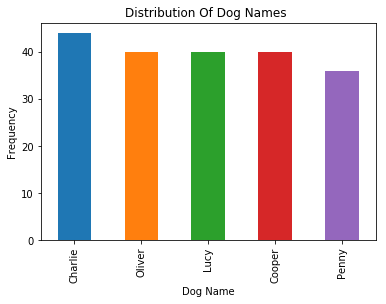

In [18]:
# select the dog names frequencies
twitter_archive['dog_name'].value_counts()[1:6].plot('bar')
plt.title("Distribution Of Dog Names ")
plt.xlabel('Dog Name')
plt.ylabel('Frequency');

The figure shows Top 5 dog's names